## Business problem understanding

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# drop because all are unique
df['PassengerId'].nunique()

891

In [6]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [7]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [8]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [9]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [10]:
# drop because all are unique
df['Name'].nunique()

891

In [11]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [12]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [13]:
# has some missing values
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [14]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [15]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [16]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [17]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [18]:
# drop 
df['Ticket'].nunique()

681

In [19]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [20]:
df['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [21]:
# drop too many missing values
df['Cabin'].isnull().sum()

687

In [22]:
# has some missing values
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [23]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

### Drop unimportant columns

In [24]:
df.drop(columns=['Name','PassengerId','Ticket','Cabin'],inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [25]:
continuous = ['Age','Fare']
discrete_categorical = ['Survived','Pclass','Sex','Embarked']
discrete_count = ['SibSp','Parch']

In [26]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

### Exploratory Data Analysis

In [27]:
df[continuous].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


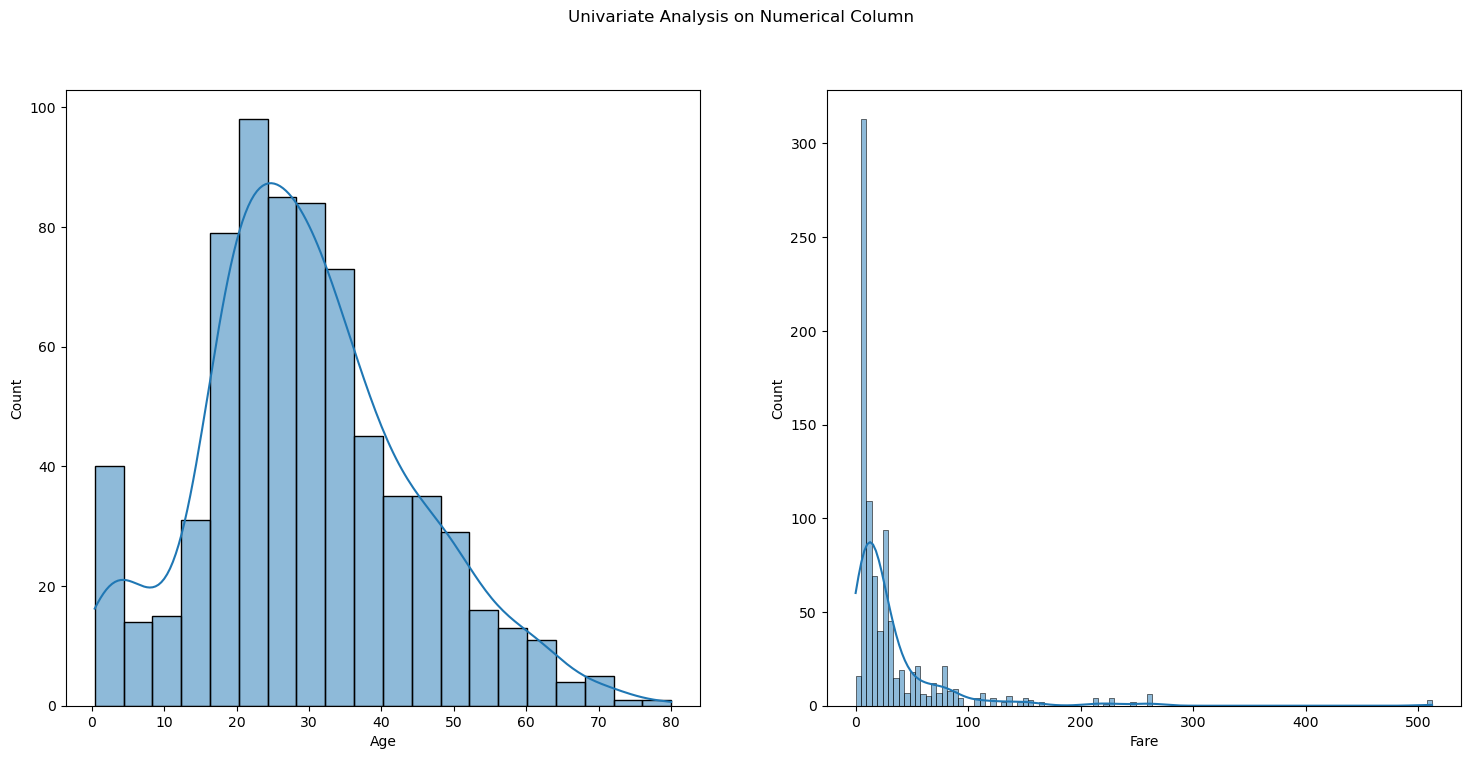

In [28]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(1,2,1)
sns.histplot(df['Age'],kde=True)

plt.subplot(1,2,2)
sns.histplot(df['Fare'],kde=True)

plt.suptitle('Univariate Analysis on Numerical Column')
plt.show()

In [29]:
df[continuous].skew()

Age     0.389108
Fare    4.787317
dtype: float64

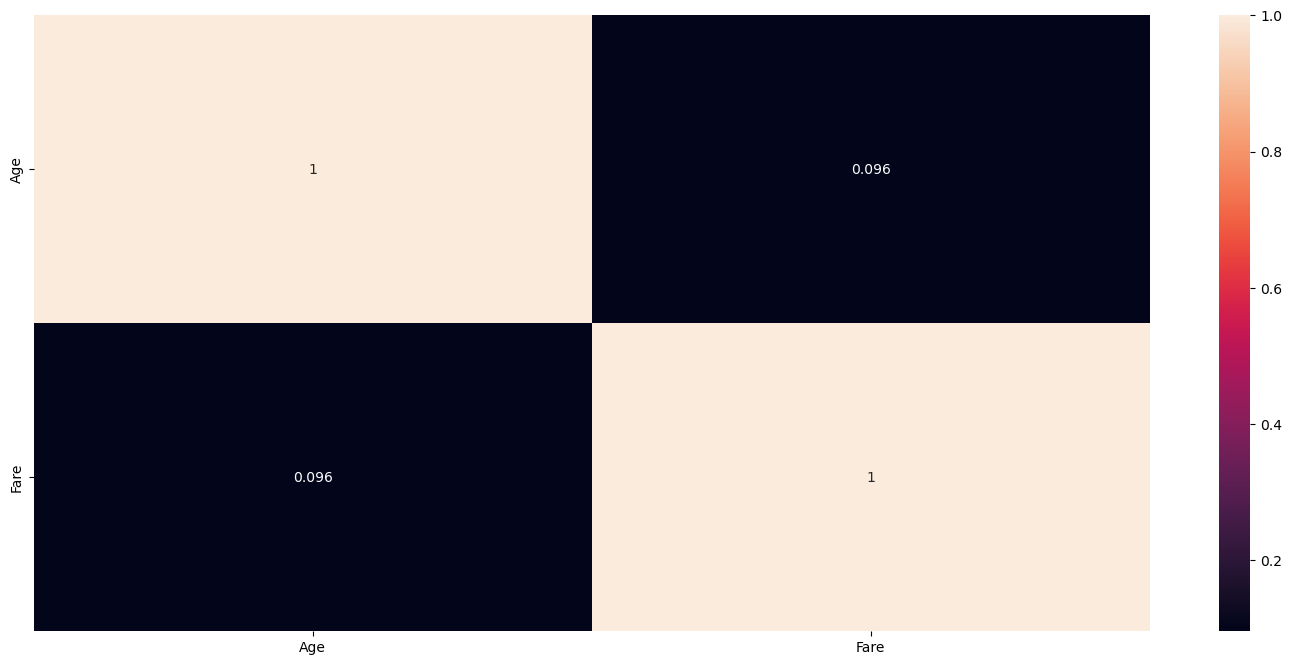

In [30]:
sns.heatmap(df[continuous].corr(),annot=True)
plt.show()

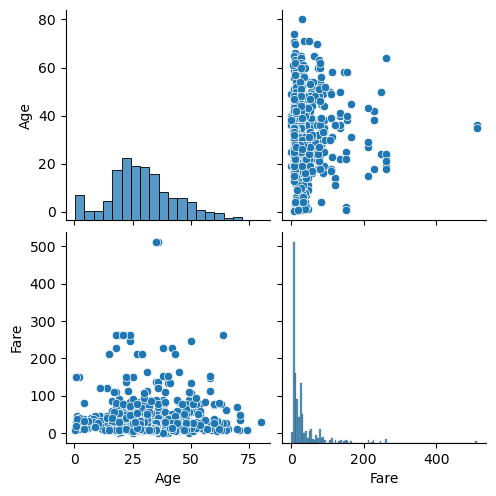

In [31]:
sns.pairplot(df[continuous])
plt.show()

In [32]:
df[discrete_categorical].describe()

,Survived,Pclass
count,891.000000,891.000000
mean,0.383838,2.308642
std,0.486592,0.836071
min,0.000000,1.000000
25%,0.000000,2.000000
50%,0.000000,3.000000
75%,1.000000,3.000000
max,1.000000,3.000000


In [33]:
df[discrete_categorical]

,Survived,Pclass,Sex,Embarked
0,0,3,male,S
1,1,1,female,C
2,1,3,female,S
3,1,1,female,S
4,0,3,male,S
...,...,...,...,...
886,0,2,male,S
887,1,1,female,S
888,0,3,female,S
889,1,1,male,C


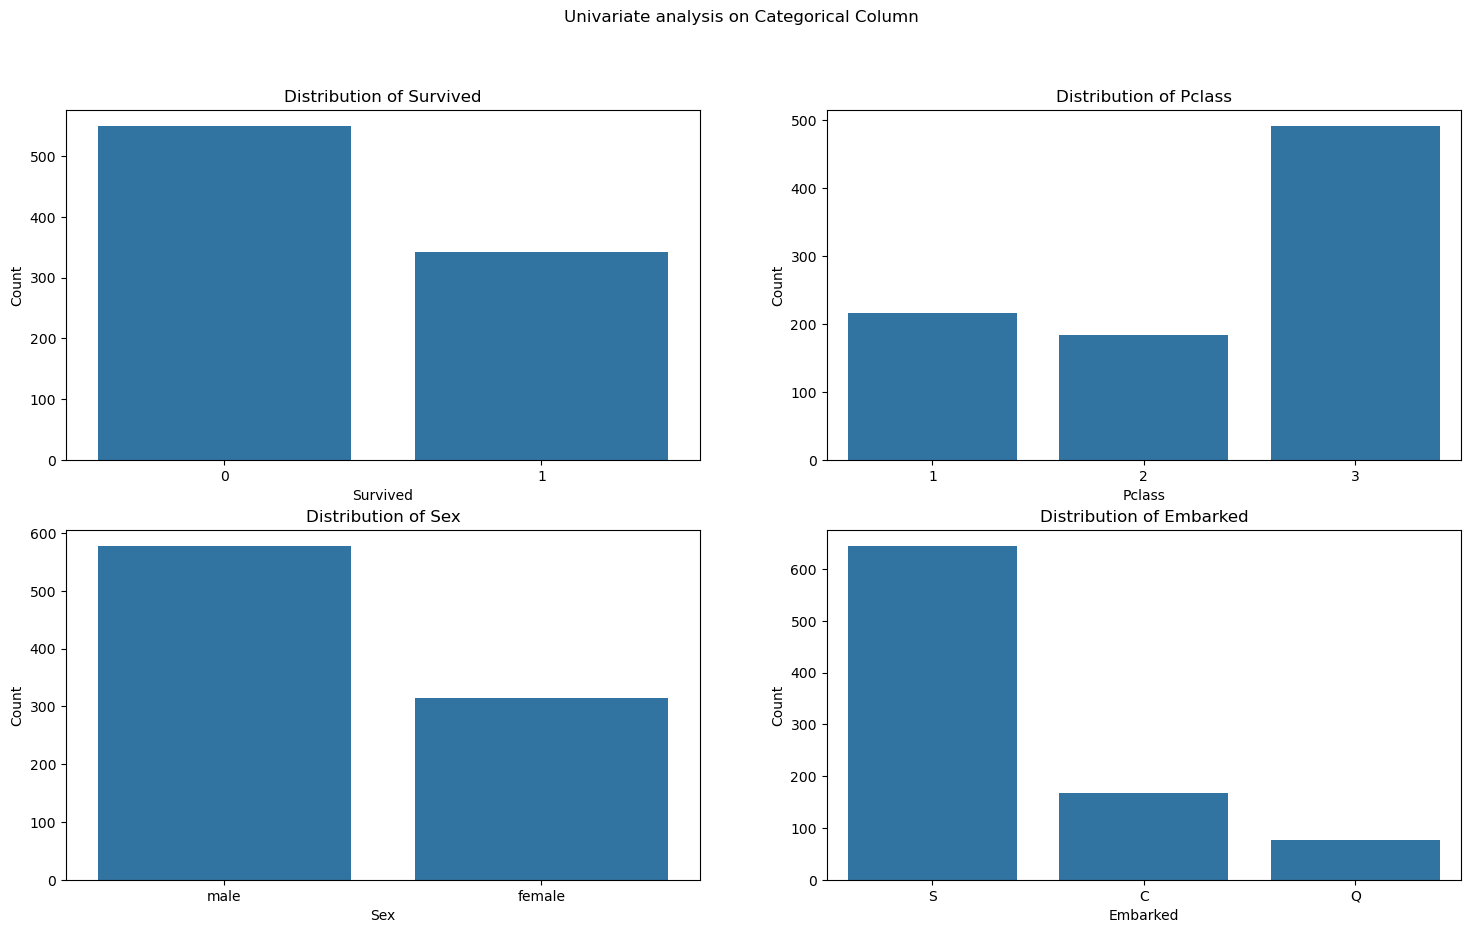

In [34]:
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
sns.countplot(x = df['Survived'])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Distribution of Survived')

plt.subplot(2,2,2)
sns.countplot(x = df['Pclass'])
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Distribution of Pclass')

plt.subplot(2,2,3)
sns.countplot(x = df['Sex'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')

plt.subplot(2,2,4)
sns.countplot(x = df['Embarked'])
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Distribution of Embarked')

plt.suptitle('Univariate analysis on Categorical Column')
plt.show()

In [35]:
print('Impact of Pclass on Survived')
print(pd.crosstab(df['Survived'],df['Pclass']))
print('\n')

print('Impact of Sex on Survived')
print(pd.crosstab(df['Survived'],df['Sex']))
print('\n')

print('Impact of Embarked on Survived')
print(pd.crosstab(df['Survived'],df['Embarked']))

Impact of Pclass on Survived
Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


Impact of Sex on Survived
Sex       female  male
Survived              
0             81   468
1            233   109


Impact of Embarked on Survived
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


#### check for missing values

In [36]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

#### check skewness

In [37]:
df[continuous].skew()

Age     0.389108
Fare    4.787317
dtype: float64

#### Check outliers

Text(0.5, 1.0, 'FARE')

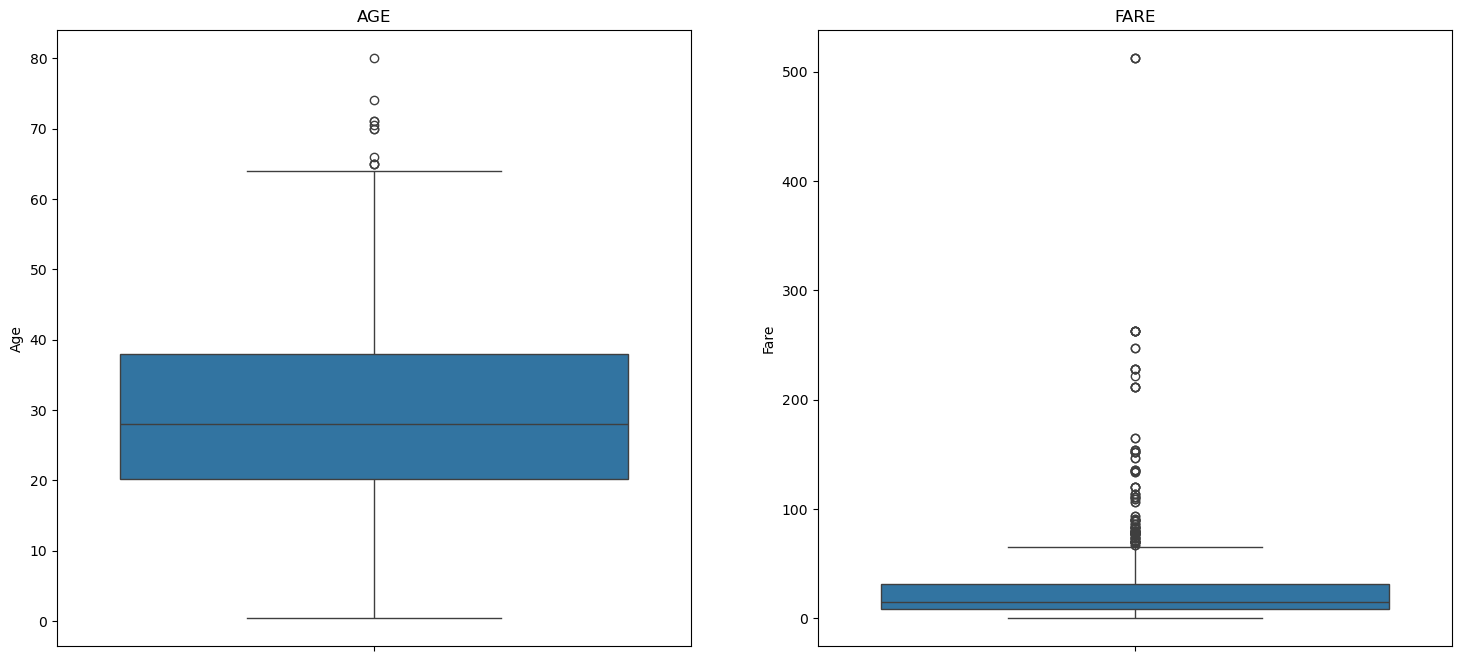

In [38]:
plt.subplot(1,2,1)
sns.boxplot(df['Age'])
plt.title('AGE')

plt.subplot(1,2,2)
sns.boxplot(df['Fare'])
plt.title('FARE')

### Data Preperation

##### 1. Data Cleaning
###### · Wrong data
###### . Missing values
###### . wrong data type
###### . duplicates
###### . outliers
##### 2. Data Wrangling
###### · transformation (applicable on continous)
###### . scaling (applicable on continous)
###### · encoding (applicable on discrete categorical)
###### · Dont apply any Data Wrangling Technique on count variable

#### Wrong Data Treatment

In [39]:
# NONE

#### Missing value Treatment

In [40]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

#### Data type conversion

In [41]:
# None needed

#### Outliers treatment

In [42]:
# Not removing any outliers for now as Fare can be high for some and age also

#### Encoding

In [43]:
df['Sex'] = df['Sex'].map({'male':1,'female':0})
df = pd.get_dummies(df,columns=['Embarked'], dtype=int,drop_first=True)
# df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2} )

#### Transformations

In [44]:
df['Age'] = df['Age']**(1/4)
df['Fare'] = df['Fare']**(1/4)

In [2]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['Age'] = sc.fit_transform(df[['Age']])
df['Fare'] = sc.fit_transform(df[['Fare']])

NameError: name 'df' is not defined

#### X&y

In [46]:
X = df.drop(columns='Survived',axis=1)
y = df['Survived']

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=True,test_size=0.2)

NameError: name 'X' is not defined

### Modelling & Evaluation

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

ypred_train = log_model.predict(X_train)
ypred_test = log_model.predict(X_test)
print('train accuracy ',accuracy_score(y_train,ypred_train))
print('test accuracy ',accuracy_score(y_test,ypred_test))
print('CV ',cross_val_score(log_model,X_train,y_train,cv=5,scoring='accuracy').mean())

train accuracy  0.8132022471910112
test accuracy  0.7932960893854749
CV  0.8118290160543682


In [52]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

[[91 15]
 [22 51]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       106
           1       0.77      0.70      0.73        73

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



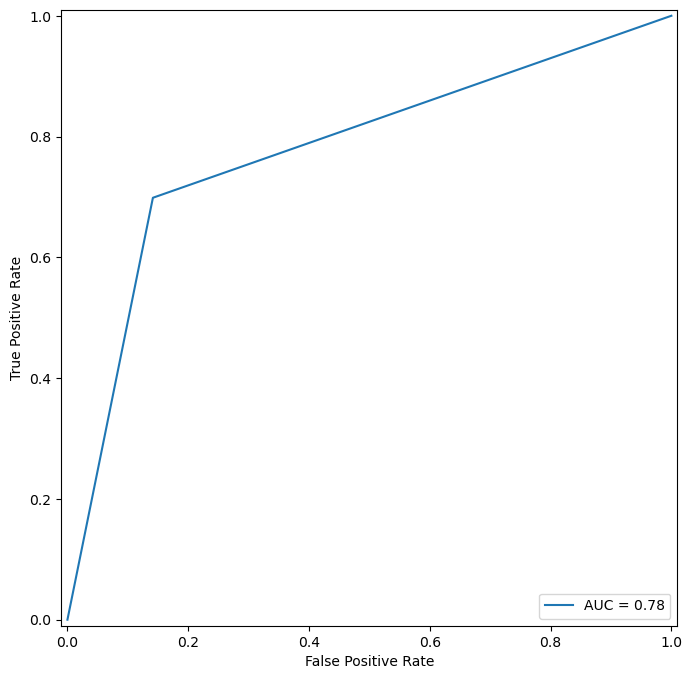

In [53]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

fpr,tpr,thresholds = roc_curve(y_test,ypred_test)
roc_auc = auc(fpr,tpr)
RocCurveDisplay(fpr = fpr,tpr = tpr,roc_auc = roc_auc).plot()
plt.show()

In [57]:
from sklearn.metrics import roc_auc_score
print('AUC score :',roc_auc_score(y_test,ypred_test))

AUC score : 0.7785603515120186


#### KNN

In [58]:
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1,51)),'p':[1,2]}
knn_grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
knn_grid.fit(X_train,y_train)

knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=23, p=1)

In [59]:
knn_model = knn_grid.best_estimator_
knn_model.fit(X_train,y_train)

ypred_train = knn_model.predict(X_train)
ypred_test = knn_model.predict(X_test)
print('train accuracy ',accuracy_score(y_train,ypred_train))
print('test accuracy ',accuracy_score(y_test,ypred_test))
print('CV ',cross_val_score(knn_model,X_train,y_train,cv=5,scoring='accuracy').mean())

train accuracy  0.8455056179775281
test accuracy  0.7653631284916201
CV  0.8301093272924259


#### Support vector machine

In [55]:
from sklearn.svm import SVC
estimator = SVC()
param_grid = {'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
svm_grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
svm_grid.fit(X_train,y_train)

svm_grid.best_estimator_

SVC(C=0.8)

In [56]:
svm_model = svm_grid.best_estimator_
svm_model.fit(X_train,y_train)

ypred_train = svm_model.predict(X_train)
ypred_test = svm_model.predict(X_test)
print('train accuracy ',accuracy_score(y_train,ypred_train))
print('test accuracy ',accuracy_score(y_test,ypred_test))
print('CV ',cross_val_score(svm_model,X_train,y_train,cv=5,scoring='accuracy').mean())

train accuracy  0.8370786516853933
test accuracy  0.7877094972067039
CV  0.8301388752092977


#### Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=True)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=True)

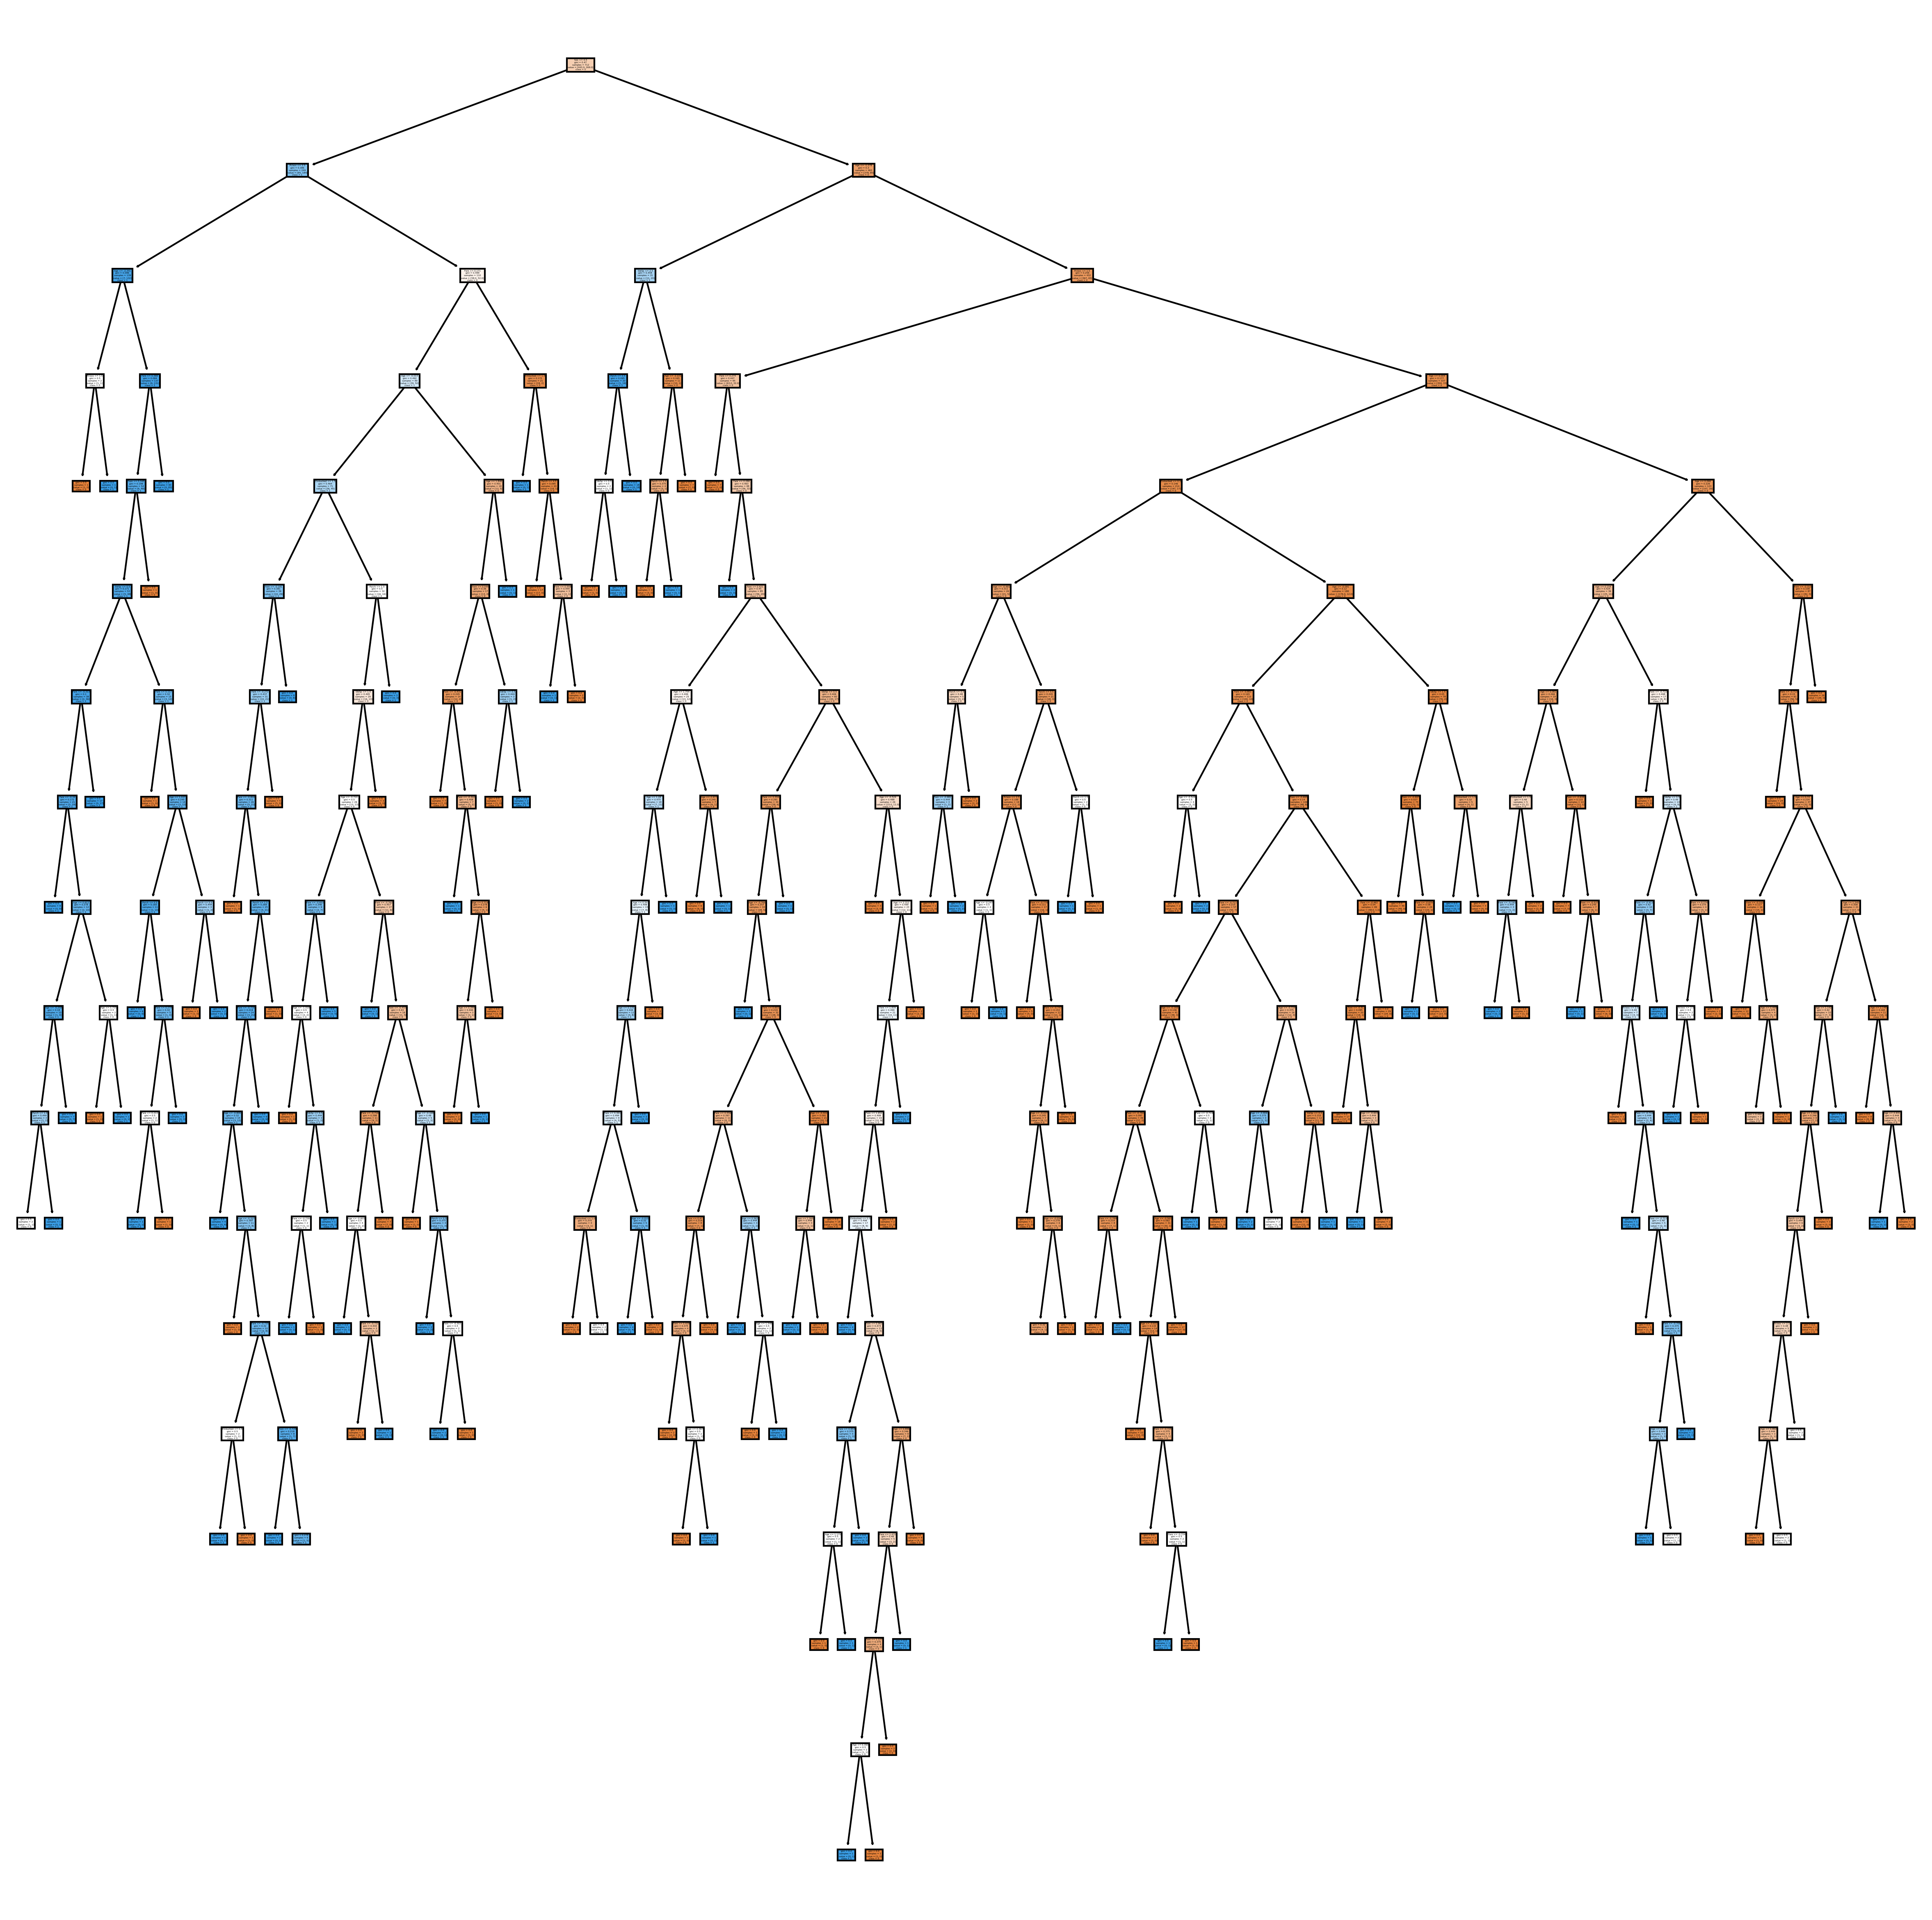

In [58]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20),dpi=300)
plot_tree(model,filled=True,
         feature_names=X_train.columns.to_list(),
         class_names=['0','1'])
plt.show()

In [59]:
estimator = DecisionTreeClassifier(random_state=True)
param_grid = {'criterion':['gini','entropy'],
              'max_depth':list(range(1,18))}
dt_grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
dt_grid.fit(X_train,y_train)

dt = dt_grid.best_estimator_
dt

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=True)

In [60]:
# Important features

feats_ab = pd.DataFrame(data = dt.feature_importances_,
                       index=X.columns,
                       columns=['Importance'])
important_features_dt = feats_ab[feats_ab['Importance']>0].index.to_list()
important_features_dt

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [61]:
X_train_dt = X_train[important_features_dt]
X_test_dt = X_test[important_features_dt]

dt = dt_grid.best_estimator_
dt.fit(X_train_dt,y_train)

ypred_train = dt.predict(X_train_dt)
ypred_test = dt.predict(X_test_dt)
print('train accuracy ',accuracy_score(y_train,ypred_train))
print('test accuracy ',accuracy_score(y_test,ypred_test))
print('CV ',cross_val_score(dt,X_train_dt,y_train,cv=5,scoring='accuracy').mean())

train accuracy  0.8539325842696629
test accuracy  0.7877094972067039
CV  0.8287107258938246


#### Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier()
param_grid = {'n_estimators':list(range(1,51))}
rf_grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
rf_grid.fit(X_train,y_train)

rf = rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=20)

In [ ]:
feats_ab = pd.DataFrame(data=rf.feature_importances_,
                       index=X.columns,
                       columns=['Importance'])
important_features_rf = feats_ab[feats_ab['Importance']>0].index.to_list()
important_features_rf

In [ ]:
X_train_rf = X_train[important_features_rf]
X_test_rf = X_test[important_features_rf]

rf = rf_grid.best_estimator_
rf.fit(X_train_rf,y_train)

ypred_train = rf.predict(X_train_rf)
ypred_test = rf.predict(X_test_rf)
print('train accuracy ',accuracy_score(y_train,ypred_train))
print('test accuracy ',accuracy_score(y_test,ypred_test))
print('CV ',cross_val_score(rf,X_train_rf,y_train,cv=5,scoring='accuracy').mean())

#### Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
estimator = AdaBoostClassifier()
param_grid = {'n_estimators':list(range(1,51))}
ab_grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
ab_grid.fit(X_train,y_train)
ab = ab_grid.best_estimator_
ab

In [ ]:
feats_ab = pd.DataFrame(data=ab.feature_importances_,
                       index=X.columns,
                       columns=['Importance'])
important_features_ab = feats_ab[feats_ab['Importance']>0].index.tolist()
important_features_ab

In [ ]:
X_train_ab = X_train[important_features_ab]
X_test_ab = X_test[important_features_ab]

ab = ab_grid.best_estimator_
ab.fit(X_train_ab,y_train)

ypred_train = ab.predict(X_train_ab)
ypred_test = ab.predict(X_test_ab)
print('train accuracy ',accuracy_score(y_train,ypred_train))
print('test accuracy ',accuracy_score(y_test,ypred_test))
print('CV ',cross_val_score(ab,X_train_ab,y_train,cv=5,scoring='accuracy').mean())

#### Gradient Boost Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
estimator = GradientBoostingClassifier()
param_grid = {'n_estimators':list(range(1,51)),
              'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
gb_grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
gb_grid.fit(X_train,y_train)

gb = gb_grid.best_estimator_
gb

In [ ]:
feats_ab = pd.DataFrame(data = gb.feature_importances_,
                       index=X.columns,
                       columns=['Importance'])
important_features_gb = feats_ab[feats_ab['Importance']>0].index.to_list()
important_features_gb

In [ ]:
X_train_gb = X_train[important_features_gb]
X_test_gb = X_test[important_features_gb]

gb = gb_grid.best_estimator_
gb.fit(X_train_gb,y_train)

ypred_train = gb.predict(X_train_gb)
ypred_test = gb.predict(X_test_gb)
print('train accuracy ',accuracy_score(y_train,ypred_train))
print('test accuracy ',accuracy_score(y_test,ypred_test))
print('CV ',cross_val_score(gb,X_train_gb,y_train,cv=5,scoring='accuracy').mean())

#### Xgboost Classifier

In [ ]:
from xgboost import XGBClassifier
estimator = XGBClassifier()
param_grid = {'n_estimator':[10,20,30,40,50,60,70,80,90,100],
             'max_depth':[1,2,3,4,5,6,7,8,9],
             'gamma':[0.1,0.3,0.5,0.7,0.9]}
xgb_grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
xgb_grid.fit(X_train,y_train)
xgb = xgb_grid.best_estimator_
xgb

In [ ]:
feats_ab = pd.DataFrame(data=xgb.feature_importances_,
                       index=X.columns,
                       columns=['Importance'])
important_features_xgb = feats_ab[feats_ab['Importance']>0].index.to_list()
important_features_xgb

In [ ]:
X_train_xgb = X_train[important_features_xgb]
X_test_xgb = X_test[important_features_xgb]

xgb = xgb_grid.best_estimator_
xgb.fit(X_train_xgb,y_train)

ypred_train = xgb.predict(X_train_xgb)
ypred_test = xgb.predict(X_test_xgb)
print('train accuracy ',accuracy_score(y_train,ypred_train))
print('test accuracy ',accuracy_score(y_test,ypred_test))
print('CV ',cross_val_score(xgb,X_train_xgb,y_train,cv=5,scoring='accuracy').mean())

#### Save the best model

In [60]:
from joblib import dump
dump(log_model,'titanic.joblib')

['titanic.joblib']

#### Predict on new Data

In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
from joblib import load

log_model = load('titanic.joblib')

In [3]:
X_test = pd.read_csv('test.csv')
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
X_test.drop(columns=['Name','PassengerId','Ticket','Cabin'],inplace=True)
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].median())
X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].median())
#X_test['Fare']= X_test['Fare'].dropna(inplace=True)
#X_test.drop(index=[152],inplace=True)
#X_test.dropna(inplace=True)
X_test['Embarked'] = X_test['Embarked'].fillna(X_test['Embarked'].mode()[0])
X_test['Sex'] = X_test['Sex'].map({'male':1,'female':0})
X_test = pd.get_dummies(X_test,columns=['Embarked'], dtype=int,drop_first=True)
X_test['Age'] = X_test['Age']**(1/4)
X_test['Fare'] = X_test['Fare']**(1/4)
sc = StandardScaler()
X_test['Age'] = sc.fit_transform(X_test[['Age']])
X_test['Fare'] = sc.fit_transform(X_test[['Fare']])
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,0.463640,0,0,-0.777529,1,0
1,3,0,1.090135,1,0,-0.851887,0,1
2,2,1,1.694020,0,0,-0.630191,1,0
3,3,1,0.000251,0,0,-0.708535,0,1
4,3,0,-0.365711,1,1,-0.456180,0,1
...,...,...,...,...,...,...,...,...
413,3,1,0.000251,0,0,-0.758731,0,1
414,1,0,0.706286,0,0,1.731313,0,0
415,3,1,0.680397,0,0,-0.828803,0,1
416,3,1,0.000251,0,0,-0.758731,0,1


In [5]:
test_data = pd.read_csv('test.csv')
test_data.drop(columns=['Name','Ticket','Cabin'],inplace=True)
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())
#X_test['Fare']= X_test['Fare'].dropna(inplace=True)
#X_test.drop(index=[152],inplace=True)
#test_data.dropna(inplace=True)
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])
test_data['Sex'] = test_data['Sex'].map({'male':1,'female':0})
test_data = pd.get_dummies(test_data,columns=['Embarked'], dtype=int,drop_first=True)
test_data['Age'] = test_data['Age']**(1/4)
test_data['Fare'] = test_data['Fare']**(1/4)
sc = StandardScaler()
test_data['Age'] = sc.fit_transform(test_data[['Age']])
test_data['Fare'] = sc.fit_transform(test_data[['Fare']])
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,892,3,1,0.463640,0,0,-0.777529,1,0
1,893,3,0,1.090135,1,0,-0.851887,0,1
2,894,2,1,1.694020,0,0,-0.630191,1,0
3,895,3,1,0.000251,0,0,-0.708535,0,1
4,896,3,0,-0.365711,1,1,-0.456180,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,0.000251,0,0,-0.758731,0,1
414,1306,1,0,0.706286,0,0,1.731313,0,0
415,1307,3,1,0.680397,0,0,-0.828803,0,1
416,1308,3,1,0.000251,0,0,-0.758731,0,1


In [6]:
prediction = log_model.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': prediction})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [7]:
df = pd.read_csv('submission.csv')

In [8]:
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
